In [2]:
from PIL import Image
import numpy
import random
import math

apple = Image.open("banner.png")
array = numpy.array(apple)


for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] > 150:
            array[i][j] = [0,min(255,2 * array[i][j][1]),min(255,2 * array[i][j][2]), 255]
        array[i][j][0] += random.uniform(-0.1, 0.1)
        array[i][j][1] += random.uniform(-0.1, 0.1)
        array[i][j][2] += random.uniform(-0.1, 0.1)
        array[i][j][3] += random.uniform(-0.1, 0.1)

apple2 = Image.fromarray(array)
apple2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'banner.png'

[]
[array([-19.38820941,   7.18266397,  20.67591172,   1.21600697]), array([-19.69519257,   7.28000246,  20.9975962 ,   1.21673884]), array([-20.00924788,   7.36542827,  21.32180888,   1.21808759]), array([-20.33076323,   7.43579457,  21.64788614,   1.2201677 ]), array([-20.67084111,   7.56392696,  22.01128491,   1.22000762]), array([-21.01941054,   7.67879996,  22.37810511,   1.22053959]), array([-21.38401126,   7.8346168 ,  22.77404571,   1.21960661]), array([-21.75822053,   7.97616685,  23.17411052,   1.21942638]), array([-22.14612494,   8.13212007,  23.59199497,   1.21887898]), array([-22.54832402,   8.30393049,  24.02877812,   1.21793663]), array([-22.96543077,   8.49321691,  24.48562321,   1.21656933]), array([-23.39542867,   8.66096748,  24.94711287,   1.21624126]), array([-23.84907664,   8.97582183,  25.48222585,   1.21083447]), array([-24.31419146,   9.23252804,  26.00806568,   1.20789605]), array([-24.79766264,   9.5671435 ,  26.57920818,   1.20258374]), array([-25.29715438, 

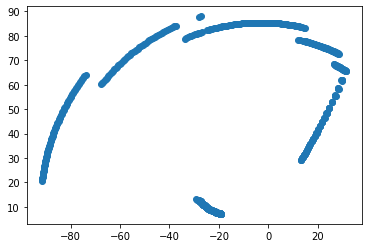

In [1]:
from PIL import Image
import numpy
from Controller import converter
import cv2

from matplotlib import pyplot

leftImg, rightImg = numpy.split(numpy.array(Image.open("img9.png")), 2, axis=1)

def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
leftBlurredIn, leftEdgesIn, gLeftIn, rLeftIn = converter.filter(leftImg)
# show(leftBlurredIn)
# show(leftEdgesImage)

# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rightBlurredIn, rightEdgesIn, gRightIn, rRightIn = converter.filter(rightImg)

distances, croppedLeft, rawHeightsLeft = converter.getDistances(leftBlurredIn, leftEdgesIn, rightBlurredIn, rightEdgesIn)

# for i in rawHeightsLeft:
#     croppedLeft[i][rawHeightsLeft[i]] = 125
# show(croppedLeft)
# image = []

# print(rawHeightsLeft)

# # print(heights)
# # print(left)
# print(distances)
x = []
y = []
for i in distances:
    # print(i)
    # if i[2] < 200:
    x.append(i[0])
    y.append(i[1])
# pyplot.xlim(-150, 50)
# pyplot.ylim(0, 200)

pyplot.scatter(x, y)
# for i in range(len(rawHeightsLeft)):
#     print(rawHeightsLeft[i])
#     print(distances[i])

# for i in distances:
#     image.append([i[2], i[2], i[2]])
# show(numpy.array(image))
# show(numpy.concatenate(([distances], [distances], [distances]), axis=0))
rBlobs, gBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)

print(gBlobs)

outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks = converter.getLandmarks(distances, rBlobs, gBlobs)

# for landmark in outerWallLandmarks:
#     if landmark[2] < 30:
#         print(landmark)
print(outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks)

print(converter.focalLength, converter.focalLengthA)

In [ ]:
import math

horizontalFov = 155
verticalFov = 115
imageWidth = 272
imageHeight = 154
focalLength = ((imageHeight / 2) / math.tan(math.pi * (verticalFov / 2) / 180))
wallHeight = 10
centerOffset = 10
dist = wallHeight * math.sqrt(focalLength**2 + (imageWidth / 2 - 29)**2) / 36
# return (dir * (3 + a[1] * dist), (10 + a[2] * dist), dist)

print(focalLength)
dist